<a href="https://colab.research.google.com/github/LucasVale98/Machine_Learning_e_Data_Science_com_Python_de_A-Z/blob/main/Agrupamento_(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly --upgrade

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import  StandardScaler
from sklearn.cluster import  KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import  AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import  datasets

from scipy.cluster.hierarchy import dendrogram, linkage

# **Agrupamento com k-means**

**K-means - base salário idade**

In [ ]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

In [ ]:
grafico = px.scatter(x=x, y=y)
grafico.show()

In [ ]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [ ]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario) 
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [ ]:
KMeans_salario = KMeans(n_clusters=3)
KMeans_salario.fit(base_salario)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centroides = KMeans_salario.cluster_centers_
centroides

array([[-1.63312883, -0.77505093],
       [ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025]])

In [ ]:
scaler_salario.inverse_transform(KMeans_salario.cluster_centers_)

array([[  22.66666667, 1700.        ],
       [  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ]])

In [ ]:
rotulos = KMeans_salario.labels_
rotulos

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
grafico1 = px.scatter(x=base_salario[:,0], 
                      y=base_salario[:, 1],
                      color=rotulos)
grafico2 = px.scatter(x=centroides[:,0], 
                      y=centroides[:,1],
                      size=[12, 12, 12])
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

**K-means - dados aleatórios**

In [ ]:
X_random, y_random = make_blobs(n_samples=200, centers=5, random_state=0)

In [ ]:
X_random

array([[ 1.36069966,  0.74802912],
       [-3.27894024,  9.89995288],
       [ 0.58894326,  4.00148458],
       [-0.97373942,  6.94454493],
       [ 2.43169305, -0.20173713],
       [ 0.62835793,  4.4601363 ],
       [-2.16434104,  2.52061045],
       [-0.65392827,  4.76656958],
       [ 0.73240494,  2.87562511],
       [ 1.956815  ,  0.23418537],
       [ 2.11567076,  3.06896151],
       [ 3.18190344, -0.18226785],
       [ 7.01769098, -3.35367647],
       [-2.34026827,  1.45145793],
       [ 0.30380963,  3.94423417],
       [ 0.829832  ,  1.74202664],
       [-3.06770103,  2.98114426],
       [-1.36641982,  7.15528181],
       [-1.10630261,  7.5161316 ],
       [ 2.41163392,  1.60423683],
       [-2.37508158,  7.10478226],
       [-2.47135027,  2.50783257],
       [ 2.47034915,  4.09862906],
       [-1.63313558,  7.9298116 ],
       [ 8.58924431, -0.67161883],
       [ 3.92282648,  1.80370832],
       [-1.38420548,  8.97235138],
       [ 1.05566092,  6.77544419],
       [ 9.08260172,

In [ ]:
y_random

array([1, 3, 0, 3, 1, 0, 2, 0, 2, 1, 0, 1, 4, 2, 0, 1, 2, 3, 3, 1, 3, 2,
       0, 3, 4, 1, 3, 3, 4, 3, 1, 2, 0, 0, 2, 0, 4, 3, 1, 0, 2, 0, 0, 1,
       4, 4, 4, 1, 1, 3, 0, 1, 3, 1, 4, 4, 2, 3, 4, 1, 4, 4, 2, 0, 2, 4,
       0, 1, 1, 4, 4, 1, 4, 0, 0, 4, 2, 2, 2, 1, 3, 3, 1, 1, 3, 3, 0, 0,
       4, 4, 3, 4, 3, 3, 0, 0, 1, 2, 4, 0, 0, 2, 4, 1, 1, 4, 4, 3, 0, 2,
       1, 0, 4, 3, 2, 1, 2, 0, 2, 2, 4, 0, 4, 2, 0, 2, 0, 3, 0, 2, 2, 0,
       3, 1, 3, 4, 0, 2, 4, 4, 1, 4, 2, 2, 3, 1, 1, 3, 1, 0, 2, 3, 4, 4,
       4, 0, 3, 2, 0, 4, 3, 3, 2, 3, 1, 2, 3, 3, 4, 0, 2, 2, 2, 1, 0, 3,
       4, 3, 3, 1, 1, 2, 0, 2, 2, 0, 2, 0, 3, 3, 4, 1, 1, 1, 1, 1, 4, 4,
       2, 3])

In [ ]:
grafico = px.scatter(x=X_random[:,0], y=X_random[:,1])
grafico.show()

In [ ]:
KMeans_blobs = KMeans(n_clusters=5)
KMeans_blobs.fit(X_random)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
rotulos = KMeans_blobs.labels_
rotulos

array([0, 2, 3, 2, 0, 3, 4, 3, 3, 0, 0, 0, 1, 4, 3, 0, 4, 2, 2, 0, 2, 4,
       3, 2, 1, 0, 2, 3, 1, 2, 0, 4, 4, 3, 4, 3, 1, 2, 0, 3, 4, 3, 3, 0,
       1, 1, 1, 0, 0, 2, 3, 0, 2, 0, 1, 1, 4, 2, 1, 0, 1, 1, 4, 3, 4, 1,
       4, 0, 0, 1, 1, 0, 1, 3, 2, 1, 3, 4, 4, 3, 2, 3, 0, 0, 2, 2, 3, 3,
       1, 1, 2, 1, 2, 2, 3, 3, 0, 4, 1, 3, 3, 4, 1, 0, 0, 1, 1, 2, 3, 4,
       0, 3, 1, 2, 4, 0, 4, 4, 4, 4, 1, 3, 1, 3, 3, 4, 3, 2, 0, 4, 4, 3,
       2, 0, 2, 1, 3, 4, 1, 1, 0, 1, 4, 4, 2, 0, 0, 2, 0, 3, 4, 2, 1, 1,
       1, 4, 2, 4, 0, 1, 2, 2, 4, 2, 0, 4, 2, 2, 1, 3, 3, 4, 0, 0, 3, 2,
       1, 2, 2, 0, 0, 4, 3, 4, 4, 3, 4, 3, 2, 2, 1, 3, 0, 0, 0, 0, 1, 1,
       4, 2], dtype=int32)

In [ ]:
centroides = KMeans_blobs.cluster_centers_
centroides

array([[ 2.06843293,  1.35387645],
       [ 9.14794457, -2.61667701],
       [-1.5489702 ,  8.00822173],
       [ 0.80770852,  4.36953255],
       [-1.64966744,  2.7065182 ]])

In [ ]:
grafico1 = px.scatter(x=X_random[:,0], 
                      y=X_random[:, 1],
                      color=rotulos)
grafico2 = px.scatter(x=centroides[:,0], 
                      y=centroides[:,1],
                      size=[5,5,5,5,5])
grafico3 = go.Figure(data= grafico1.data + grafico2.data)
grafico3.show()

**K-means - base cartão de crédito 1**

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [ ]:
base_cartao = pd.read_csv('/content/credit_card_clients.csv', header=1)
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
base_cartao['BILL_TOTAL'] = base_cartao.BILL_AMT1 + base_cartao.BILL_AMT2 + base_cartao.BILL_AMT3 + base_cartao.BILL_AMT4 + base_cartao.BILL_AMT5 + base_cartao.BILL_AMT6

In [ ]:
base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [ ]:
X_cartao = base_cartao.iloc[:, [1,25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [ ]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

Método do cotovelo

In [ ]:
wcss = []
for i in range(1, 11):
  KMeans_cartao = KMeans(n_clusters=i, random_state=0)
  KMeans_cartao.fit(X_cartao)
  wcss.append(KMeans_cartao.inertia_)

In [ ]:
wcss

[60000.0,
 35197.73925382836,
 20128.14098757631,
 14943.389077745102,
 10707.842075549495,
 8603.473181334297,
 7397.980104443422,
 6351.888604089764,
 5664.878200466927,
 5049.550278457274]

In [ ]:
grafico = px.line(x=range(1,11), y=wcss)
grafico.show()

In [ ]:
KMeans_cartao = KMeans(n_clusters=4, random_state=0)
KMeans_cartao.fit(X_cartao)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
rotulos = KMeans_cartao.labels_
rotulos

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
grafico1 = px.scatter(x=X_cartao[:,0], 
                      y=X_cartao[:, 1],
                      color=rotulos)
grafico1.show()

In [ ]:
lista_clientes = np.column_stack([base_cartao, rotulos])
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]], dtype=int64)

In [ ]:
lista_clientes = np.column_stack([base_cartao, rotulos])
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16776, 120000,      1, ...,      0,  13311,      0],
       [ 16775,  20000,      1, ...,      0, 110522,      0],
       ...,
       [ 17301, 110000,      2, ...,      0, 516377,      3],
       [  1695,  80000,      2, ...,      1, 516777,      3],
       [  4541, 180000,      2, ...,      0, 835665,      3]], dtype=int64)

**K-means - base cartão de crédito 2**

In [ ]:
base_cartao.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_TOTAL'],
      dtype='object')

In [ ]:
X_cartao = base_cartao.iloc[:, [1,2,3,4,5,25]].values
X_cartao

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [ ]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)
X_cartao

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

In [ ]:
wcss = []
for i in range(1, 11):
  KMeans_cartao = KMeans(n_clusters=i, random_state=0)
  KMeans_cartao.fit(X_cartao)
  wcss.append(KMeans_cartao.inertia_)

wcss

[180000.0,
 143649.06809897744,
 123753.66522426665,
 108637.0884072354,
 95861.29704247152,
 86984.71793958725,
 80306.61572980105,
 76025.40307671402,
 72245.52344743308,
 68734.76471621935]

In [ ]:
grafico = px.line(x=range(1,11), y=wcss)
grafico.show()

In [ ]:
KMeans_cartao = KMeans(n_clusters=2, random_state=0)
KMeans_cartao.fit(X_cartao)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
rotulos = KMeans_cartao.labels_
rotulos

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
pca = PCA(n_components=2)
X_cartao_pca = pca.fit_transform(X_cartao)
X_cartao_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [ ]:
grafico1 = px.scatter(x=X_cartao_pca[:,0], 
                      y=X_cartao_pca[:, 1],
                      color=rotulos)
grafico1.show()

In [ ]:
lista_clientes = np.column_stack([base_cartao, rotulos])
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       [ 16668,  20000,      1, ...,      1, 114061,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17361, 150000,      2, ...,      1, 457070,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]], dtype=int64)

# **Outros algoritmos de agrupamento**

**Agrupamento hierárquico - base salário idade**

In [ ]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [ ]:
grafico = px.scatter(x =base_salario[:,0], y=base_salario[:,1])
grafico.show()

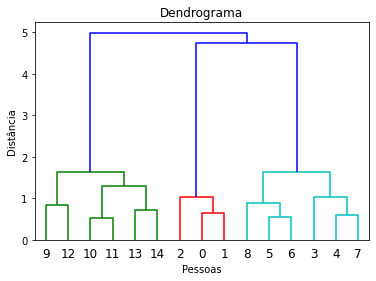

In [ ]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

In [ ]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
hc_salario.fit(base_salario)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
rotulos = hc_salario.labels_
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
grafico1 = px.scatter(x=base_salario[:,0], 
                      y=base_salario[:, 1],
                      color=rotulos)
grafico1.show()

**DBSCAN - base salário idade**

In [ ]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [ ]:
dbscan_salario = DBSCAN(eps=0.95, min_samples=2)
dbscan_salario.fit(base_salario)

DBSCAN(algorithm='auto', eps=0.95, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [ ]:
rotulos = dbscan_salario.labels_
rotulos 

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [ ]:
grafico1 = px.scatter(x=base_salario[:,0], 
                      y=base_salario[:, 1],
                      color=rotulos)
grafico1.show()

**DBSCAN x Hierárquico x K-means**

In [ ]:
X_random, y_random = datasets.make_moons(n_samples=1500, noise=0.09)

In [ ]:
X_random

array([[ 0.50978879,  0.94177599],
       [-0.34993499,  0.96541118],
       [ 1.99678943,  0.47300619],
       ...,
       [ 0.45810746, -0.16196976],
       [ 0.42572962,  0.96064197],
       [ 1.88585216,  0.17775334]])

In [ ]:
y_random

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
grafico = px.scatter(x=X_random[:,0], y=X_random[:,1])
grafico.show()

In [ ]:
KMeans_random = KMeans(n_clusters=2)
rotulos = KMeans_random.fit_predict(X_random)

grafico = px.scatter(x=X_random[:,0], y=X_random[:,1], color=rotulos)
grafico.show()

In [ ]:
hc_random = AgglomerativeClustering(n_clusters=2,  affinity='euclidean', linkage='ward')
rotulos = hc_random.fit_predict(X_random)

grafico = px.scatter(x=X_random[:,0], y=X_random[:,1], color=rotulos)
grafico.show()

In [ ]:
dbscan_random = DBSCAN(eps=0.1)
rotulos = dbscan_random.fit_predict(X_random)

grafico = px.scatter(x = X_random[:,0], y = X_random[:, 1], color = rotulos)
grafico.show()